In [1]:
!tar xzvf data.tar.gz

gaia_edr3_100pc.csv
gaia_edr3_rand.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

# 太陽から100pc以内の星のHR図

In [3]:
df1 = pd.read_csv('gaia_edr3_100pc.csv')
n_all = len(df1)

## Sample selection
以下の条件を満たすのサンプルを選択
- 年周視差の相対誤差 $\sigma_\varpi/\varpi < 0.1$
- $G-G_{\mathrm{BR}}$の誤差が0.02未満

In [4]:
df1['err_g_rp'] = 2.5/np.log(10.)*np.sqrt(1./df1['phot_g_mean_flux_over_error']**2 + 1./df1['phot_rp_mean_flux_over_error']**2) # error in the G - rp color
df1 = df1[(df1['parallax'] > 10.*df1['parallax_error']) & (df1['err_g_rp'] < 0.02)] #select the high SN samples
df1['mag_g_abs'] = df1['phot_g_mean_mag'] - 10. + 5.*np.log10(df1['parallax']) # absolute magnitude in the Gaia G band
n_select = len(df1)

In [5]:
print(f'{n_select} stars among {n_all} stars in the Gaia data')

285917 stars among 574531 stars in the Gaia data


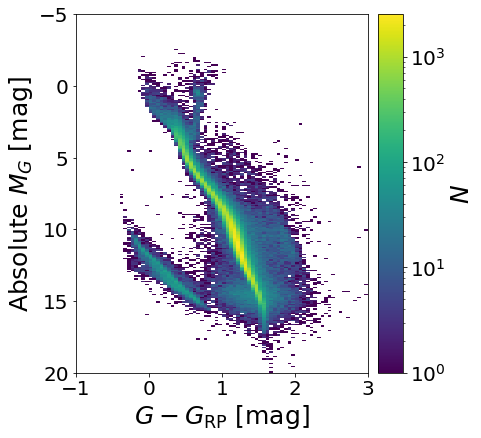

In [6]:
fig = plt.figure(figsize=[7, 6])
ax = fig.add_axes([0.15, 0.13, 0.58, 0.83])
ax_cb = fig.add_axes([0.75, 0.13, 0.05, 0.83])
hst = ax.hist2d(df1['phot_g_mean_mag']-df1['phot_rp_mean_mag'], df1['mag_g_abs'],
                range=[[-1, 3], [-5, 20]], bins=[80, 250],
                norm=matplotlib.colors.LogNorm(),
                rasterized=True
               )
fig.colorbar(hst[3], cax=ax_cb, ax=ax)
ax.set_xlim(-1, 3)
ax.set_ylim(20, -5)
ax.set_xlabel(r'$G - G_{\mathrm{RP}}$ [mag]', fontsize=25)
ax.set_ylabel(r'Absolute $M_G$ [mag]', fontsize=25)
ax_cb.set_ylabel(r'$N$', fontsize=25)
ax.tick_params(labelsize=20)
ax_cb.tick_params(labelsize=20)

fig.savefig('HR_diagram_gaia_100pc.pdf' )

# Gaia EDR3カタログからランダムに選んだ星のHR図

In [7]:
df2 = pd.read_csv('gaia_edr3_rand.csv')
n_all = len(df1)

In [8]:
df2['err_g_rp'] = 2.5/np.log(10.)*np.sqrt(1./df2['phot_g_mean_flux_over_error']**2 + 1./df2['phot_rp_mean_flux_over_error']**2) # error in the G - rp color
df2 = df2[(df2['parallax'] > 10.*df2['parallax_error']) & (df2['err_g_rp'] < 0.02)] #select the high SN samples
df2['mag_g_abs'] = df2['phot_g_mean_mag'] - 10. + 5.*np.log10(df2['parallax']) # absolute magnitude in the Gaia G band
n_select = len(df1)

In [9]:
print(f'{n_select} stars among {n_all} stars in the Gaia data')

285917 stars among 285917 stars in the Gaia data


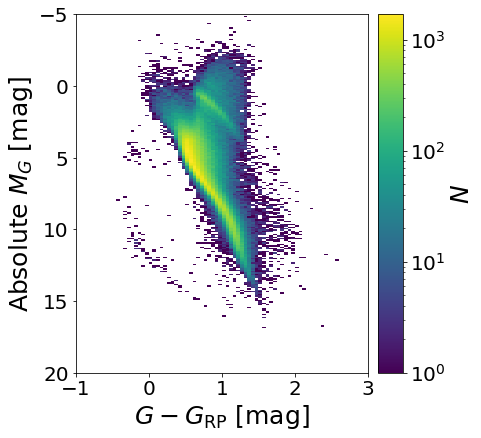

In [10]:
fig = plt.figure(figsize=[7, 6])
ax = fig.add_axes([0.15, 0.13, 0.58, 0.83])
ax_cb = fig.add_axes([0.75, 0.13, 0.05, 0.83])
hst = ax.hist2d(df2['phot_g_mean_mag']-df2['phot_rp_mean_mag'], df2['mag_g_abs'],
                range=[[-1, 3], [-5, 20]], bins=[80, 250],
                norm=matplotlib.colors.LogNorm(),
                rasterized=True
               )
fig.colorbar(hst[3], cax=ax_cb, ax=ax)
ax.set_xlim(-1, 3)
ax.set_ylim(20, -5)
ax.set_xlabel(r'$G - G_{\mathrm{RP}}$ [mag]', fontsize=25)
ax.set_ylabel(r'Absolute $M_G$ [mag]', fontsize=25)
ax_cb.set_ylabel(r'$N$', fontsize=25)
ax.tick_params(labelsize=20)
ax_cb.tick_params(labelsize=20)

fig.savefig('HR_diagram_gaia_rand.pdf' )

# astroqueryを使って直接Gaiaデータを取得する

In [11]:
!pip install astroquery

In [12]:
from astroquery.gaia import Gaia

Gaia EDR3カタログから年周視差の相対誤差が10%以下の星を10個取ってくる。

参考
- https://astroquery.readthedocs.io/en/latest/gaia/gaia.html
- https://www.physik.uzh.ch/events/sf2019/tutorials/manual.pdf

In [13]:
job = Gaia.launch_job_async(
    'SELECT TOP 10 * '+ 
    'FROM gaiaedr3.gaia_source '+
    'WHERE parallax_over_error>10.')
table = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [14]:
table

solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,deg,deg,deg,deg
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float64,float64,float64
1636042515805110273,Gaia EDR3 5747551451988663680,5747551451988663680,1080004080,2016.0,130.08662744055306,0.030603927,-11.767121185249515,0.021770043,0.4008005775680973,0.040080056,10.000001,3.7895918,-3.453330011547395,0.040384136,1.5606145674367509,0.03427203,-0.043532446,-0.11342357,-0.16923134,0.13411613,0.054341085,0.0697155,-0.32170865,0.24966489,-0.29308516,0.048769396,410,0,410,0,0.18674134,427.96136,0.0,0.0,31,False,1.5699892,--,--,--,--,--,--,--,47,20,0.05677697,49,16,0,0.00822291,159.39088,0,0,1.0057439,0.21337913,0.34897882,0.17458709,0.3953099,-54.042107,-2.3260221,-20.28952,-22.321991,False,422,7926.005423764353,2.658704,2981.1538,15.939731,42,4363.941700401212,12.592273,346.5571,16.238844,41,5098.922400201509,10.087646,505.4621,15.479199,0,1,0,2,0,1.1939008,0.7596445,0.29911327,0.46053123,--,--,0,--,--,--,236.83071174591336,17.79659888830625,136.12794657317167,-29.01498538366783
1636042515805110273,Gaia EDR3 6655483422126038528,6655483422126038528,1399439361,2016.0,277.4346586218042,0.083463125,-51.70811928127553,0.085985474,1.0297274717492804,0.10297274,10.000001,8.699391,8.379617979785396,0.0